### Planteamiento del problema
Como entidad financiera (cooperativa) se requiere la probabilidad de que un cliente adquiera un nuevo producto como ecuenta, tarjeta de crédito o un deposito_largo_plazo (cdat). Estas 3 columnas se escogieron porque eran los 3 prodcutos con menos desbalance en el dataset.


### Introducción
En este proyecto se utiliza un dataset del Banco Santander publicado en Kaggle, pero se adaptó para un contexto de una cooperativa de ahorro y crédito en Colombia. Para eso se realizaron algunos cambios como modificar el nombre de algunas columnas de los productos financieros, enfocando en los servicios que normalmente ofrecen las cooperativas.

El objetivo es crear un sistema de recomendación que prediga si un cliente puede adquirir uno o más de estos tres productos:

eCuenta (una cuenta digital con buena rentabilidad, muy usada en procesos de digitalización)

Tarjeta de crédito

CDAT a largo plazo, deposito a termino fijo

Este modelo puede ayudar a las cooperativas a ofrecer productos más ajustados a cada persona según su perfil.

En el desarrollo se realizó todo el proceso paso a paso:

1. Descarga del dataset original de Kaggle con más de 13 millones de registros y 48 columnas.
2. Realizar la carga por lotes a una base de datos de sqlite.
3. Realizar una consulta filtrando el último trimestre y solo clientes activos obteniendo 1.183.139 de resgistros.
4. Después se eliminaron columnas demograficas, geograficas, estados de cliente y de productos financieros que no son tan populares en una cooperativa, quedando así con 26 columnas.
5. Después se creó una columna con la sumatoria de los 3 productos target (ecuenta, tarjeta de crédito y deposito a largo plazo) y se realizó un filtro donde esta columna tuviera minimo un registro, se eliminaron los registros que no tuvieses ninguno de estos 3 productos. Obteniendo así 319400 registros y eliminando columnas de productos que no son del contexto de una cooperativa. 



desde la limpieza y análisis de datos, hasta el entrenamiento de modelos de machine learning y su evaluación. También incluí pruebas con varios algoritmos y ajuste de parámetros para mejorar el rendimiento del sistema de recomendación.

## Eda principal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

### Conexión a la base de datos filtrada por último semestre y solo clientes activos

In [2]:
# Conectar a la base de datos
con = sqlite3.connect("/workspaces/proyecto-final/Proyecto_filtrada.db")
#  cuántas filas hay
total = pd.read_sql("SELECT COUNT(*) AS total_filas FROM santander_trimestre;", con)
print(total)

   total_filas
0      1183139


### Creación del dataframe

In [2]:
import pandas as pd
con = sqlite3.connect("/workspaces/proyecto-final/Proyecto_filtrada.db")

df_principal= pd.read_sql("""SELECT * FROM santander_trimestre """, con)
# df_principal.head(10)

In [ ]:
df_principal.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [ ]:
df_principal.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [ ]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183139 entries, 0 to 1183138
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1183139 non-null  object 
 1   ncodpers               1183139 non-null  int64  
 2   ind_empleado           1183139 non-null  object 
 3   pais_residencia        1183139 non-null  object 
 4   sexo                   1183127 non-null  object 
 5   age                    1183139 non-null  object 
 6   fecha_alta             1183139 non-null  object 
 7   ind_nuevo              1183139 non-null  float64
 8   antiguedad             1183139 non-null  object 
 9   indrel                 1183139 non-null  float64
 10  ult_fec_cli_1t         311 non-null      object 
 11  indrel_1mes            1178666 non-null  object 
 12  tiprel_1mes            1178666 non-null  object 
 13  indresi                1183139 non-null  object 
 14  indext            

### Se eliminan las columnas con más nulos

In [3]:
df_principal.isnull().sum().sort_values(ascending=False)

conyuemp                 1182861
ult_fec_cli_1t           1182828
renta                     269367
cod_prov                    6499
nomprov                     6499
segmento                    5626
canal_entrada               5509
indrel_1mes                 4473
tiprel_1mes                 4473
sexo                          12
age                            0
fecha_alta                     0
ind_nuevo                      0
fecha_dato                     0
ind_empleado                   0
ncodpers                       0
indext                         0
indresi                        0
indrel                         0
antiguedad                     0
pais_residencia                0
indfall                        0
tipodom                        0
ind_actividad_cliente          0
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

## Imputación de nulos

### En la columna numérica renta se realiza la imputación de nulos con la mediana 

### En las columnas categoricas :
### segmento                   5626   Imputación con la palabra desconocido

### canal_entrada              5509   Imputación con la palabra desconocido

### sexo                         12   Imputación con la moda

###  tiprel_1mes                4473   Imputación con la moda

### Las siguiente columna  categorica indrel_1mes  tiene valores numéricos y de texto, entonces se convierten todos los valores a tipo string y se imputa con el valor más frecuente que en este  caso sería el valor de 1 

### indrel_1mes                4473

In [ ]:
df_principal.drop(['conyuemp', 'ult_fec_cli_1t'], axis=1, inplace=True)

 # Columna numerica renta, imputación con la ,ediana 
df_principal['renta'].fillna(df_principal['renta'].median(), inplace=True) 


# Columnas categoricas 
df_principal['cod_prov'].fillna(-1, inplace=True)  #numérico  PENDIENTE REVISAR 
df_principal['nomprov'].fillna("DESCONOCIDO", inplace=True)
df_principal['canal_entrada'].fillna("DESCONOCIDO", inplace=True)
df_principal['segmento'].fillna("DESCONOCIDO", inplace=True)
df_principal['sexo'].fillna(df_principal['sexo'].mode()[0], inplace=True)

df_principal['tiprel_1mes'].fillna(df_principal['tiprel_1mes'].mode()[0], inplace=True)

# Convertir los datos a tipo str e imputar con moda
df_principal['indrel_1mes'] = df_principal['indrel_1mes'].astype(str)
df_principal['indrel_1mes'].fillna(df_principal['indrel_1mes'].mode()[0], inplace=True)


##  Se confirma que el df queda sin valores nulos

In [4]:
df_principal.isnull().sum().sort_values(ascending=False)

fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
i

## Renombrando columnas en el contexto de una cooperativa

In [5]:
df_principal.rename(columns={
    'ind_aval_fin_ult1': 'garantias',
    'ind_cno_fin_ult1': 'cuenta_nomina',
    'ind_ctju_fin_ult1': 'cuenta_joven',
    'ind_ctma_fin_ult1' : 'cuenta_adulto_mayor',
    'ind_ctop_fin_ult1' : 'cuenta_apertura',
    'ind_ctpp_fin_ult1' : 'cuenta_pagos',
    'ind_deco_fin_ult1' : 'cuenta_debitos',
    'ind_deme_fin_ult1' : 'cdat mensual',
    'ind_fond_fin_ult1' : 'fondo_inversion',
    'ind_hip_fin_ult1' : 'hipotecas',
    'ind_reca_fin_ult1' : 'recaudaciones',
    'ind_valo_fin_ult1' : 'bonos_acciones',
    'ind_nomina_ult1'  :'nomina_domiciliada',
    'ind_nom_pens_ult1' :'pension_domiciliada',
    'ind_recibo_ult1' : 'recibos_domiciliados',
    'ind_ahor_fin_ult1': 'cuenta_ahorros',
    'ind_cco_fin_ult1': 'cuenta_corriente',
    'ind_dela_fin_ult1': 'deposito_largo_plazo',
    'ind_ecue_fin_ult1': 'ecuenta',
    'ind_pres_fin_ult1': 'prestamo_libre_inversion',
    'ind_tjcr_fin_ult1': 'tarjeta_credito',
    'ind_viv_fin_ult1': 'credito_vivienda',
    'ind_plan_fin_ult1': 'ahorro_programado',
    'ind_cder_fin_ult1':'credito_rapido'

}, inplace=True)


## Transformación de columnas 

### Se convierten las columnas edad y antiguedad a numéricas
### Se convierten las columas de fecha a tipo datetime

In [6]:
df_principal['age'] = pd.to_numeric(df_principal['age'], errors='coerce')
df_principal['antiguedad'] = pd.to_numeric(df_principal['antiguedad'], errors='coerce')

# Convertir columnas de fecha a tipo datetime
df_principal['fecha_dato'] = pd.to_datetime(df_principal['fecha_dato'], format='%Y-%m-%d', errors='coerce')
df_principal['fecha_alta'] = pd.to_datetime(df_principal['fecha_alta'], format='%Y-%m-%d', errors='coerce')

### Identificar y guardar columnas por tipo para posterior análisis

In [8]:
var_categoricas = []
var_numericas = []
var_fechas = []

for col in df_principal.columns:
    if pd.api.types.is_datetime64_any_dtype(df_principal[col]):
        var_fechas.append(col)
    elif pd.api.types.is_numeric_dtype(df_principal[col]):
        var_numericas.append(col)
    elif df_principal[col].dtype == 'object':
        var_categoricas.append(col)

print("Variables de tipo fecha:")
print(var_fechas)

print("Variables categóricas:")
print(var_categoricas)

print("Variables numéricas:")
print(var_numericas)


Variables de tipo fecha:
['fecha_dato', 'fecha_alta']
Variables categóricas:
['ind_empleado', 'pais_residencia', 'sexo', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'segmento']
Variables numéricas:
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'cuenta_ahorros', 'garantias', 'cuenta_corriente', 'credito_rapido', 'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura', 'cuenta_pagos', 'cuenta_debitos', 'cdat mensual', 'deposito_largo_plazo', 'ecuenta', 'fondo_inversion', 'hipotecas', 'ahorro_programado', 'prestamo_libre_inversion', 'recaudaciones', 'tarjeta_credito', 'bonos_acciones', 'credito_vivienda', 'nomina_domiciliada', 'pension_domiciliada', 'recibos_domiciliados']


### Conteo de frecuencias para determinas desbalanceo de las columnas target

In [ ]:
def conteo(x):
    frecuencias = df_principal[x].value_counts()
    print(f"Distribución de la variable '{x}':")
    print(frecuencias)
    print("-" * 40)

for i in var_numericas:
    conteo(i)

### Revisión del desbalance de las columnas de productos para determinar cuales columnas son las que menos tienen desbalance, el porcentaje indica el porcentaje de clientes que tienen ese producto financiero (1) activo. Entre menor sea este valor indica que muy pocas personas tienen este producto por tanto no es viable seleccionarla como target.

In [9]:
# Lista con las variables de 2 valores  
variables_binarias = [
    'cuenta_ahorros', 'garantias', 'cuenta_corriente', 'credito_rapido',
    'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura',
    'cuenta_pagos', 'cuenta_debitos', 'cdat mensual', 'deposito_largo_plazo',
    'ecuenta', 'fondo_inversion', 'hipotecas', 'ahorro_programado',
    'prestamo_libre_inversion', 'recaudaciones', 'tarjeta_credito',
    'bonos_acciones', 'credito_vivienda', 'nomina_domiciliada',
    'pension_domiciliada', 'recibos_domiciliados', 'ind_nuevo'
]

# Crear lista de registros para construir DataFrame
resumen = []

for var in variables_binarias:
    total_1 = df_principal[var].sum()
    total_0 = df_principal[var].value_counts().get(0, 0)  # en caso de que no haya 0s
    total = df_principal[var].count()
    porcentaje_1 = round((total_1 / total) * 100, 2)

    resumen.append({
        'variable': var,
        'total_1': int(total_1),
        'total_0': int(total_0),
        'total_registros': total,
        'porcentaje_1': porcentaje_1
    })

# Crear DataFrame
df_resumen = pd.DataFrame(resumen)

# Ordenar por porcentaje de casos positivos
df_resumen.sort_values(by='porcentaje_1', ascending=False, inplace=True)

# Mostrar
print(df_resumen)


                    variable  total_1  total_0  total_registros  porcentaje_1
2           cuenta_corriente   877409   305730          1183139         74.16
23      recibos_domiciliados   334574   848565          1183139         28.28
4              cuenta_nomina   212083   971056          1183139         17.93
12                   ecuenta   206305   976834          1183139         17.44
7            cuenta_apertura   203585   979554          1183139         17.21
22       pension_domiciliada   154285  1028854          1183139         13.04
21        nomina_domiciliada   141381  1041758          1183139         11.95
17             recaudaciones   125878  1057261          1183139         10.64
18           tarjeta_credito   103775  1079364          1183139          8.77
11      deposito_largo_plazo    96756  1086383          1183139          8.18
8               cuenta_pagos    82234  1100905          1183139          6.95
24                 ind_nuevo    69337  1113802          1183139 

## Variables a Evitar (Contexto proyecto) de cooperativas

nomina_domiciliada y pension_domiciliada (son más de bancos)

cuenta_ahorros (casi todos ya la tienen)

Productos muy sofisticados (bonos_acciones, fondo_inversion)

## Variables a evitar según el desbalanceo 

cuenta_ahorros: Solo 171 casos (0.014% del total)

garantias: 48 casos (0.004%)

credito_rapido: 855 casos (0.07%)

prestamo_libre_inversion: 4,895 casos (0.4%)

hipotecas: 13,624 casos (1.15%)

credito_vivienda: 6,870 casos (0.58%)

cdat mensual: 3,132 casos (0.26%)

## Variables a tener en cuenta como target 

cuenta_corriente	305,730	25.8%	

tarjeta_credito	103,775	8.8%	C

deposito_largo_plazo	96,756	8.2%	Captación

ecuenta   206305   976834          1183139         17.44

recibos_domiciliados	334,574	28.3%	


ahorro progarmado pero está muy desbalanceado

Las variables seleccionadas como objetivo son : tarjeta_Credito, deposito a largo plazo y ecuenta (teniendo cuenta el proceso de digitalización actual)

### Columnas seleccionadas del dataframe original para trabajar con  eda de forma mas especifico, sería nuestro data set a trabajar.
### Se excluyen columnas de tipo geograficas, demograficas, del estado del cliente y de productos financieros

In [ ]:
columnas_a_excluir = ['indresi','indext','indfall','indrel','ind_empleado','indrel_1mes','tiprel_1mes','pais_residencia','cod_prov','nomprov','tipodom',   
    'pension_domiciliada','nomina_domiciliada','bonos_acciones','fondo_inversion','garantias', 'recibos_domiciliados',
                     'recaudaciones','cdat mensual','ind_actividad_cliente']

# 'deposito_largo_plazo', 'ecuenta', 'tarjeta_credito'


## Creación del nuevo dataframe a trabajar con las columnas excluidas

In [ ]:
df = df_principal.drop(columns=columnas_a_excluir)


## Nuevas columnas 
### Se crea la columna total_prodcutos para obtener el consolidado de productos por persona y aspi filtrar el data set para obtener las personas que al menos tengan un producto.

### Tiene ecuenta y tarjeta de crédito para saber si un cliente tiene ambos productos al mismo tiempo

#### La columna antiguedad por edad expresa el porcentaje de vida que lleva el cliente en el banco 

### La columna meses_desde_alta calcula un aproximado de meses desde que el cliente se dio de alta 

In [ ]:

df['total_productos'] = df[['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']].sum(axis=1)

#Tiene ecuenta y tarjeta de crédito 
df['tiene_ecuenta_y_tarjeta'] = df['ecuenta'] * df['tarjeta_credito']  


#antiguedad por edad:
# expresa el porcentaje de vida que lleva el cliente en el banco 
df['antiguedad_por_edad'] = df['antiguedad'] / (df['age'] * 12)  # Convertir edad a meses

df['meses_desde_alta'] = (df['fecha_dato'] - df['fecha_alta']).dt.days / 30  


In [11]:
df.shape

(319400, 30)

In [12]:
var_categoricas_2 = []
var_numericas_2 = []
var_fechas_2 = []

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        var_fechas_2.append(col)
    elif pd.api.types.is_numeric_dtype(df[col]):
        var_numericas_2.append(col)
    elif df[col].dtype == 'object':
        var_categoricas_2.append(col)

print("Variables de tipo fecha:")
print(var_fechas_2)

print("Variables categóricas:")
print(var_categoricas_2)

print("Variables numéricas:")
print(var_numericas_2)

Variables de tipo fecha:
['fecha_dato', 'fecha_alta']
Variables categóricas:
['sexo', 'canal_entrada', 'segmento']
Variables numéricas:
['ncodpers', 'age', 'ind_nuevo', 'antiguedad', 'renta', 'cuenta_ahorros', 'cuenta_corriente', 'credito_rapido', 'cuenta_nomina', 'cuenta_joven', 'cuenta_adulto_mayor', 'cuenta_apertura', 'cuenta_pagos', 'cuenta_debitos', 'deposito_largo_plazo', 'ecuenta', 'hipotecas', 'ahorro_programado', 'prestamo_libre_inversion', 'tarjeta_credito', 'credito_vivienda', 'total_productos', 'tiene_ecuenta_y_tarjeta', 'antiguedad_por_edad', 'meses_desde_alta']


## Analisis de valores atipicos por porcentaje en cada columna continua, no las que sean binarias, usando el rango intercuartilico, se considera outlier todo lo que este fuera del rango

In [14]:
def porcentaje_outliers(df):
    porcentajes = {}
    for col in df.select_dtypes(include='number').columns:
        # Excluir columnas con solo 2 valores únicos (binarias)
        if df[col].nunique() <= 2:
            continue

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        porcentaje = len(outliers) / len(df) * 100
        porcentajes[col] = round(porcentaje, 2)

    return porcentajes

# Resultado
# print(porcentaje_outliers(df))

# Convertir diccionario a DataFrame
df_outliers = pd.DataFrame.from_dict(porcentaje_outliers(df), orient='index', columns=['% Outliers'])

# Resetear índice para tener columna con nombres
df_outliers = df_outliers.reset_index().rename(columns={'index': 'Variable'})

# Ordenar de mayor a menor
df_outliers = df_outliers.sort_values(by='% Outliers', ascending=False)

# Mostrar
print(df_outliers.head(20))  # muestra las 10 con más outliers

              Variable  % Outliers
4      total_productos       24.22
3                renta        6.76
1                  age        2.27
5  antiguedad_por_edad        0.31
0             ncodpers        0.00
2           antiguedad        0.00
6     meses_desde_alta        0.00


## Contando negativos

In [ ]:
columnas_negativos = ['age', 'renta', 'antiguedad']

for col in columnas_negativos:
    negativos = (df[col] < 0).sum()
    print(f"Valores negativos en {col}: {negativos}")


Valores negativos en age: 0
Valores negativos en renta: 0
Valores negativos en antiguedad: 0


In [16]:
# Contar cuántos tienen edad menor a 18
menores_18 = df[df['age'] < 18].shape[0]    #print("Registros con edad < 18:", (df['age'] < 18).sum())

# Contar cuántos tienen edad mayor a 100
mayores_100 = df[df['age'] > 90].shape[0]

print("Registros con edad < 18:", menores_18)
print("Registros con edad > 90:", mayores_100)

# Registros con edad > 100: 535
# Registros con edad > 80: 27965
# Registros con edad > 90: 5978

Registros con edad < 18: 6
Registros con edad > 90: 0


In [17]:
# Contar cuántos tienen edad menor a 18
antiguedad_menor= df[df['antiguedad'] < 0].shape[0]    #print("Registros con edad < 18:", (df['age'] < 18).sum())

# Contar cuántos tienen edad mayor a 100
antiguedad_mayor_100 = df[df['antiguedad'] > 100].shape[0]

print("Registros con antiguedad_menor:", antiguedad_menor)
print("Registros con antiguedad_mayor_100" , antiguedad_mayor_100)


Registros con antiguedad_menor: 0
Registros con antiguedad_mayor_100 184739


In [13]:
var_categoricas_2

['sexo', 'canal_entrada', 'segmento']

## Conteo de ceros por columna

In [18]:
# Seleccionar columnas numéricas
cols_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Filtrar columnas no binarias
no_binarias = [col for col in cols_numericas if df[col].nunique() > 2]
conteo_ceros = df[no_binarias].apply(lambda col: (col == 0).sum())
print(conteo_ceros)



ncodpers                0
age                     0
antiguedad             29
renta                   0
total_productos         0
antiguedad_por_edad    29
meses_desde_alta        0
dtype: int64


### Filtrado del dataset para eliminar datos atipicos como antiguedad con valroes negativos, edades valores mayor a 90 y de la nueva columna para obtener los clientes que minimo tengan un producto activo.

In [10]:
df = df[df['antiguedad'] >= 0]
df = df[df['age'] <= 90]
df = df[df['total_productos'] > 0]

## Analisis univariable

Para el análisis exploratorio, se obtienen las 5 categorias mas comunes de la columna canal entrada

In [19]:
top_n = 5
top_categorias = df['canal_entrada'].value_counts().nlargest(top_n).index
df['canal_entrada'] = df['canal_entrada'].apply(lambda x: x if x in top_categorias else 'Otros')

sexo
V    0.615582
H    0.384418
Name: proportion, dtype: float64


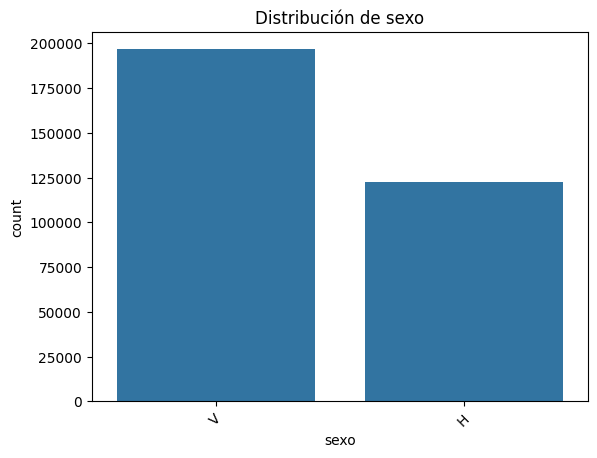

canal_entrada
KAT      0.419014
KFC      0.317818
Otros    0.154070
KFA      0.061393
KHM      0.025169
KHN      0.022536
Name: proportion, dtype: float64


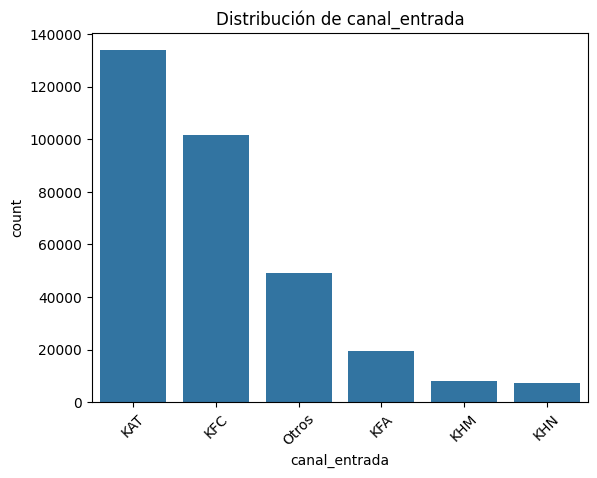

segmento
02 - PARTICULARES     0.680260
01 - TOP              0.260989
03 - UNIVERSITARIO    0.058563
DESCONOCIDO           0.000188
Name: proportion, dtype: float64


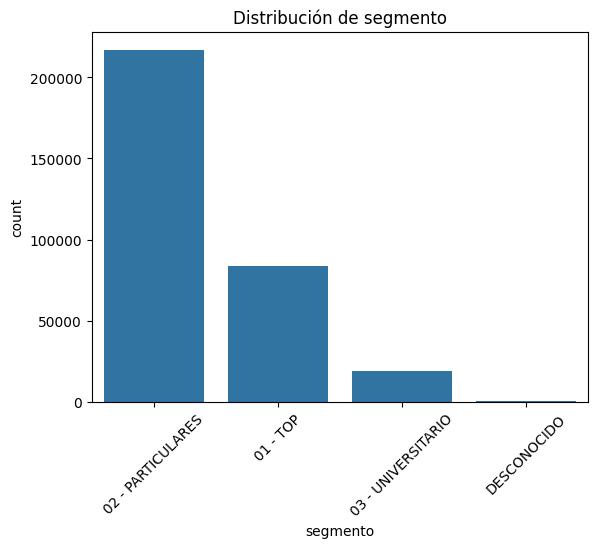

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in var_categoricas_2:
    print(df[col].value_counts(normalize=True))  
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


La mayoría de clientes son mujeres (V) con un 61.5% del total, los homLos hombres (H) representan el 38.4%.

El canal más común por el cual los clientes ingresaron es KAT (41.9%), seguido por KFC (31.7%). Se creó una categoría "Otros" para agrupar canales poco frecuentes y reducir la complejidad, por lo que son dos canales principales concentran la mayoría de los ingresos de clientes.

El segmento 02 - PARTICULARES es el más grande, con un 68% de los clientes. Le sigue 01 - TOP (26%) (clientes con alto perfil económico), y luego un grupo pequeño de universitarios (5.8%). Muy pocos clientes están en el segmento desconocido.

La mayor parte de registros estan comprendidos por clientes estandar o particulares

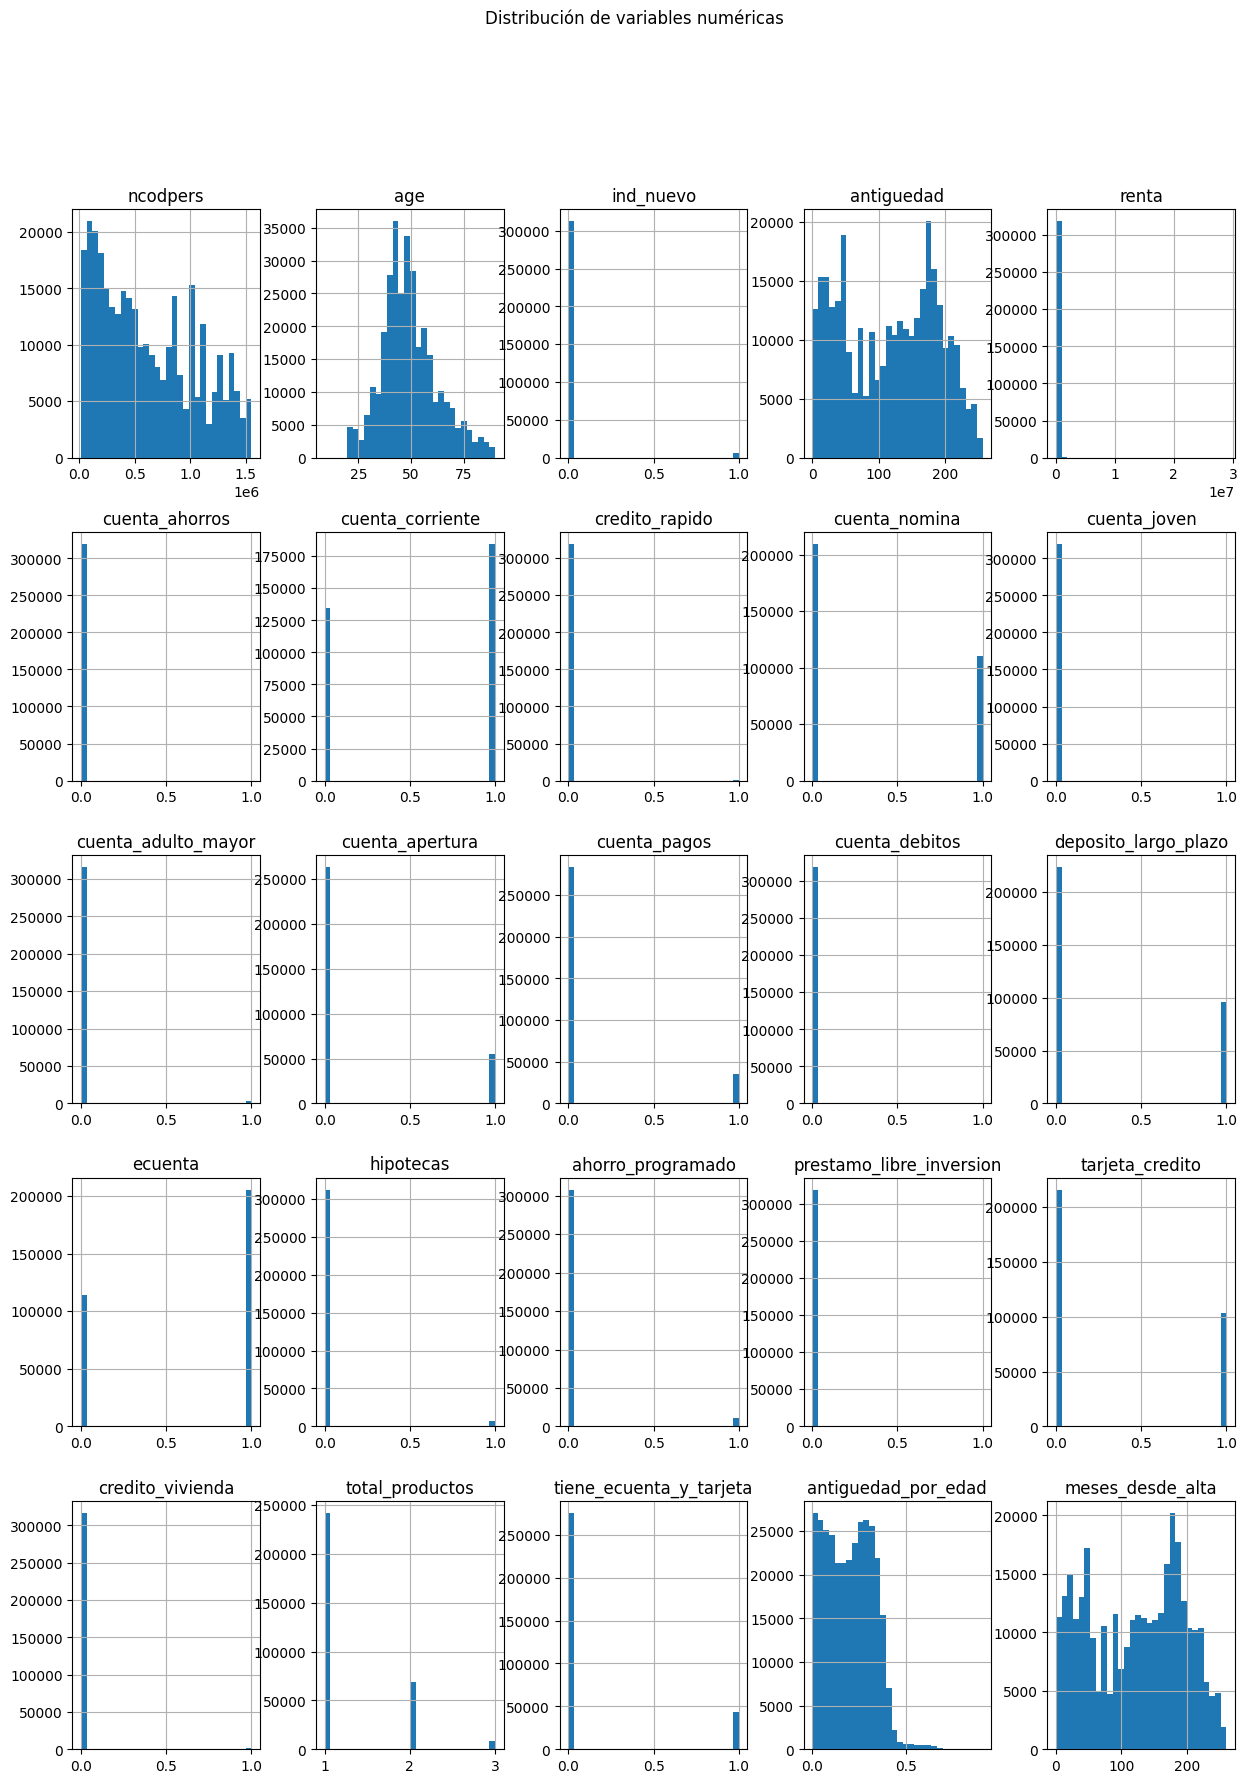

In [26]:
df[var_numericas_2].describe().T
df[var_numericas_2].hist(bins=30, figsize=(15, 20))
plt.suptitle("Distribución de variables numéricas")
plt.show()

In [20]:
conteo_renta= df['renta'].value_counts()
top_10_renta = conteo_renta.head(10)


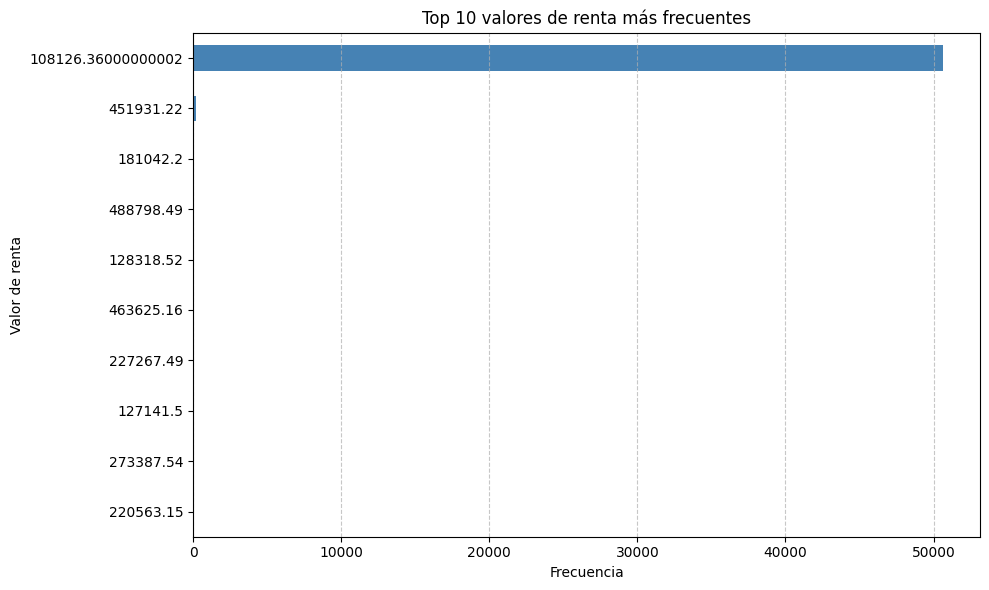

In [21]:
top_10_renta.plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 10 valores de renta más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Valor de renta')
plt.gca().invert_yaxis()  # Para que el valor más alto esté arriba
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

for col in var_numericas_2:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


## Análisis multivariado

## Evolución de clientes por mes 

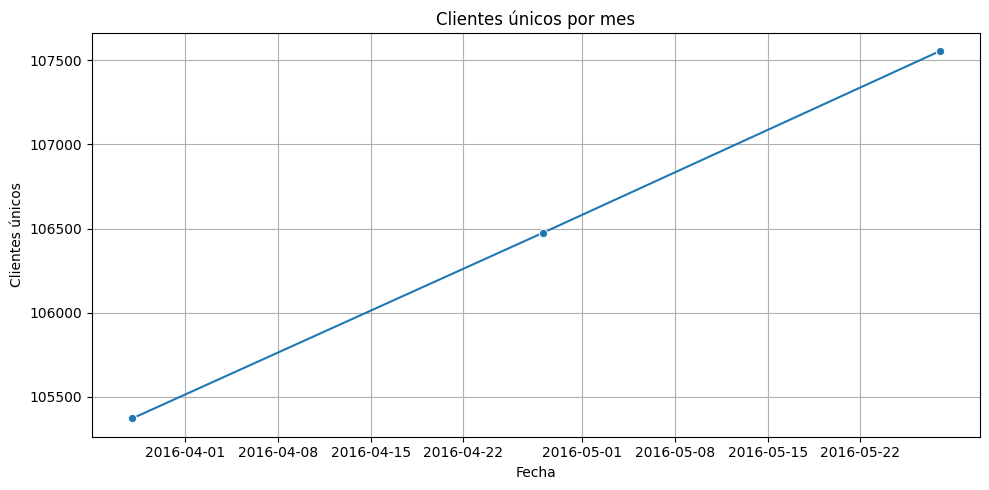

In [22]:
import seaborn as sns
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'])

clientes_mes = df.groupby('fecha_dato')['ncodpers'].nunique().reset_index()
clientes_mes.columns = ['fecha', 'clientes_unicos']

plt.figure(figsize=(10, 5))
sns.lineplot(data=clientes_mes, x='fecha', y='clientes_unicos', marker='o')
plt.title("Clientes únicos por mes")
plt.xlabel("Fecha")
plt.ylabel("Clientes únicos")
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico anterior indica que cada vez hay más clientes únicos en la muestra tomada a medida que pasa el tiempo, hay registros de clientes nuevos que se van sumando mes a mes, hay

## Promedio de renta por segmento :

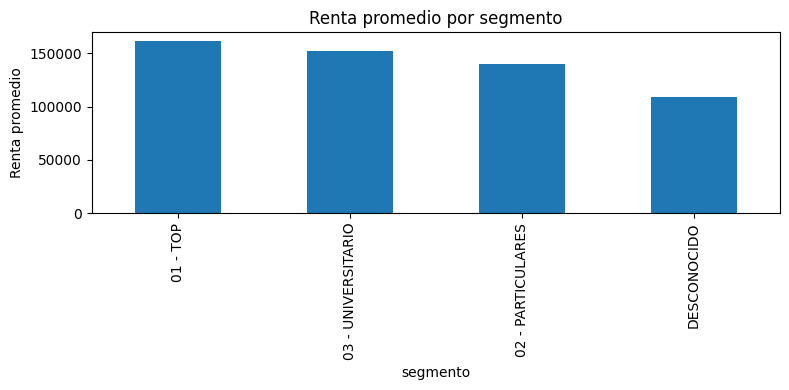

In [23]:
df.groupby('segmento')['renta'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(8, 4))
plt.title("Renta promedio por segmento")
plt.ylabel("Renta promedio")
plt.tight_layout()
plt.show()


## Proporción de uso de productos clave 

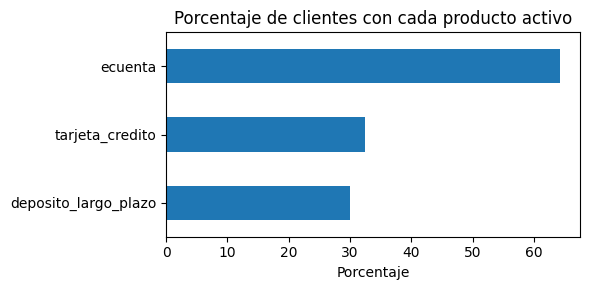

In [24]:
productos = ['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']

uso_productos = {prod: df[prod].mean()*100 for prod in productos}
pd.Series(uso_productos).sort_values().plot(kind='barh', figsize=(6, 3))
plt.title("Porcentaje de clientes con cada producto activo")
plt.xlabel("Porcentaje")
plt.tight_layout()
plt.show()


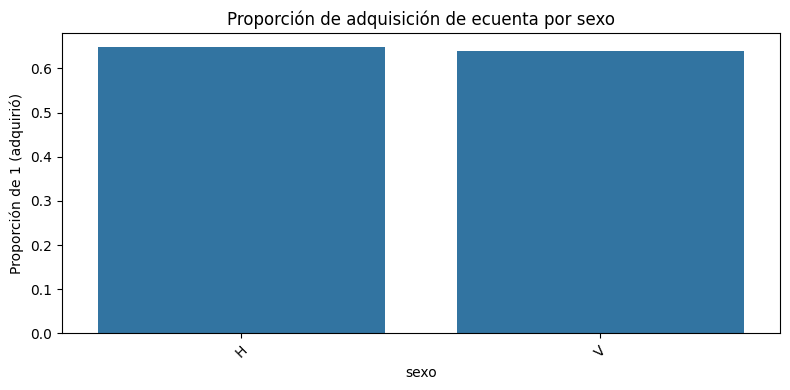

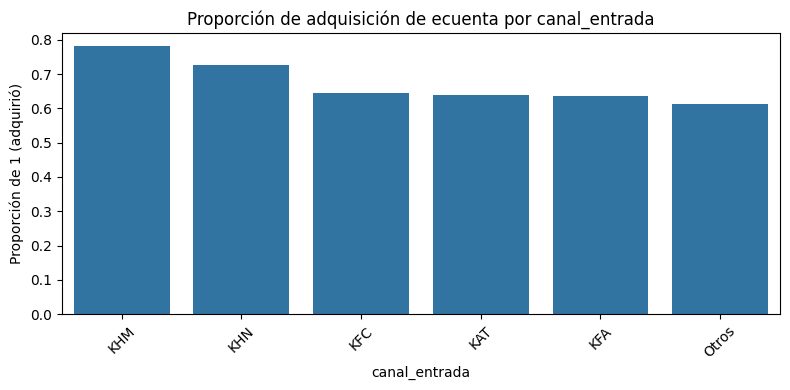

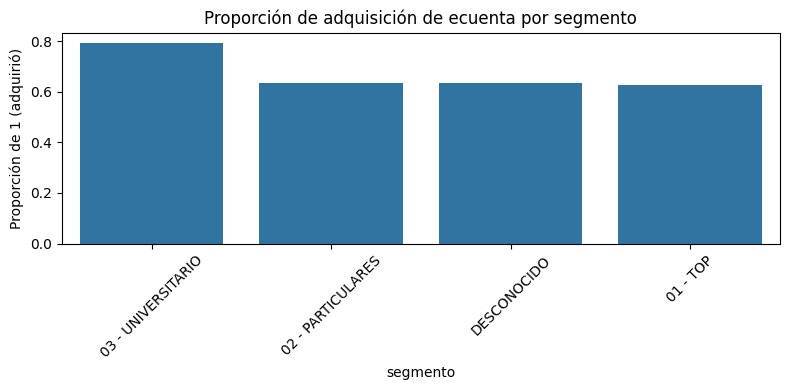

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_vars = ['sexo', 'segmento', 'canal_entrada']  # Ajusta según tus variables
target = 'ecuenta'  # Ajusta según tu producto objetivo

for col in var_categoricas_2:
    plt.figure(figsize=(8, 4))
    prop = df.groupby(col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f'Proporción de adquisición de {target} por {col}')
    plt.ylabel('Proporción de 1 (adquirió)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

target = 'tarjeta_credito'  # Ajusta según tu producto objetivo

for col in var_categoricas_2:
    plt.figure(figsize=(8, 4))
    prop = df.groupby(col)[target].mean().sort_values(ascending=False)
    sns.barplot(x=prop.index, y=prop.values)
    plt.title(f'Proporción de adquisición de {target} por {col}')
    plt.ylabel('Proporción de 1 (adquirió)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


KeyboardInterrupt: 

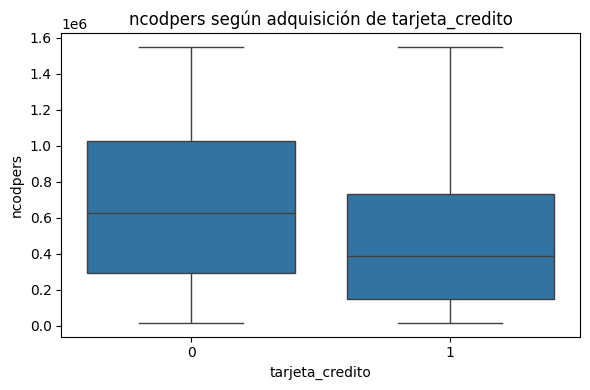

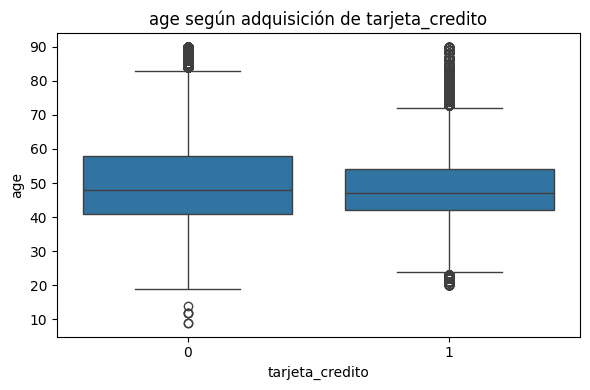

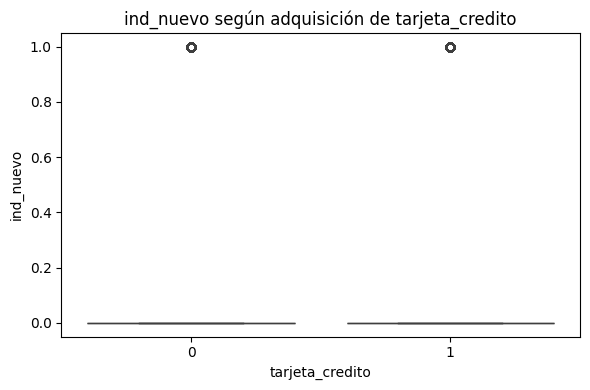

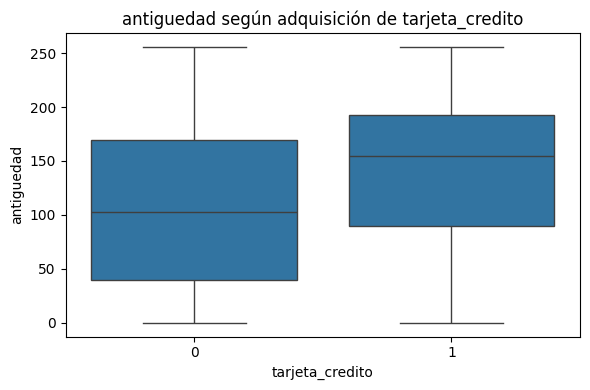

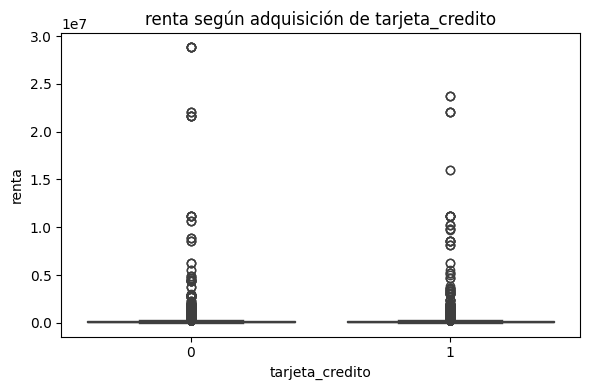

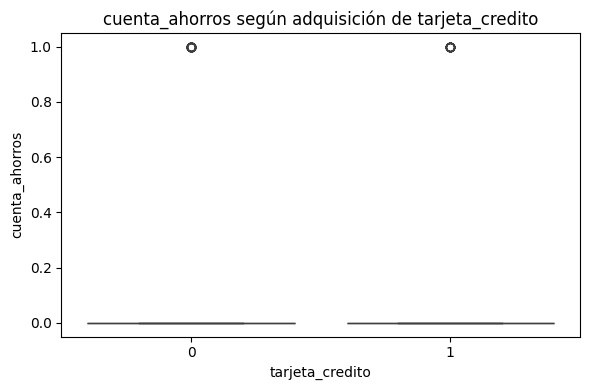

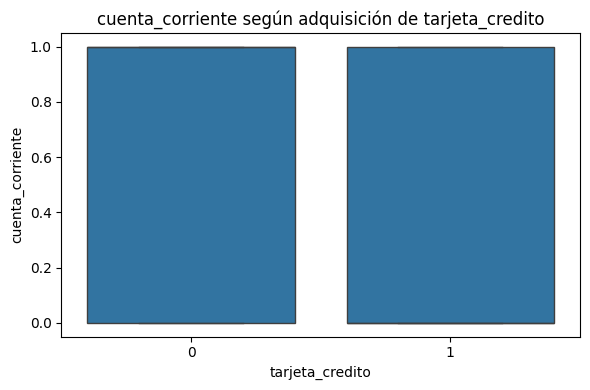

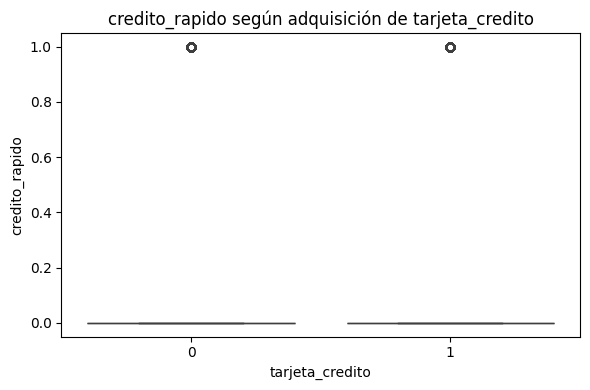

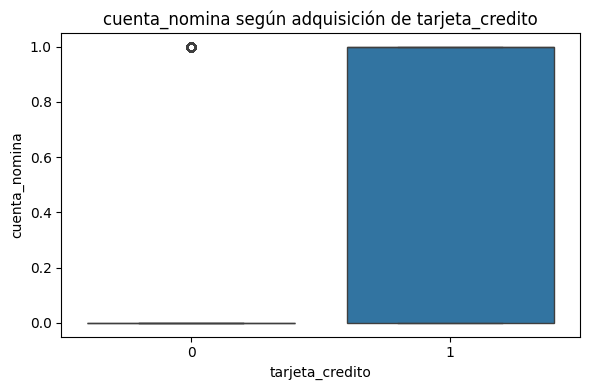

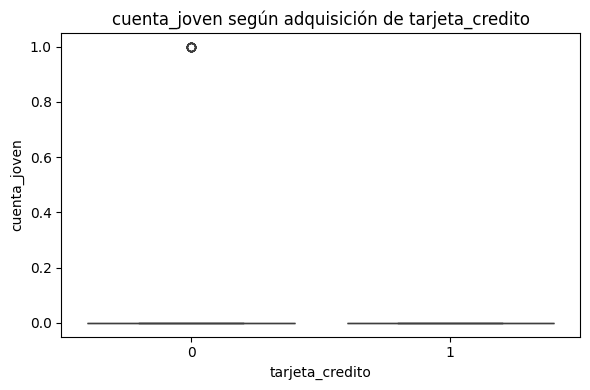

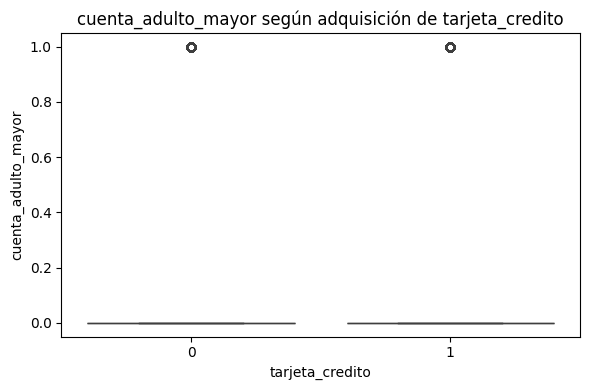

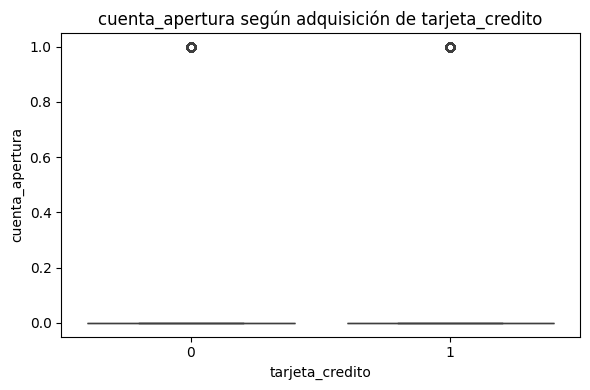

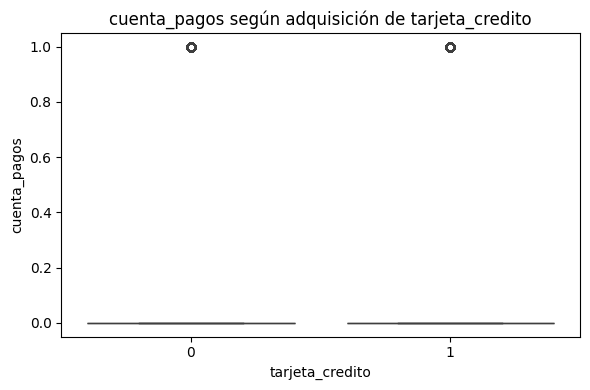

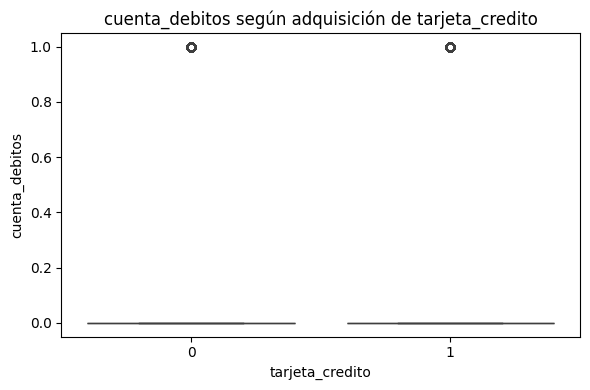

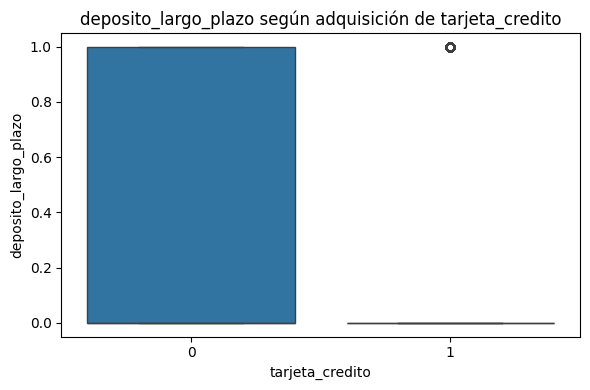

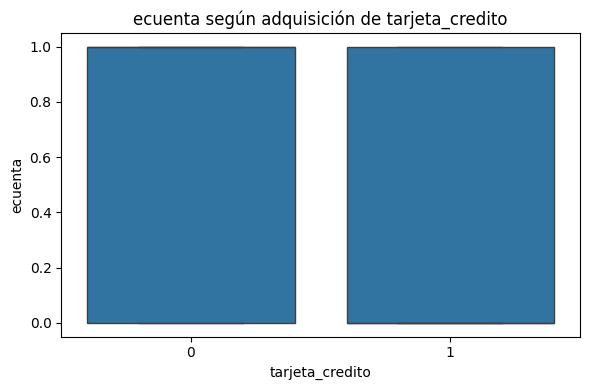

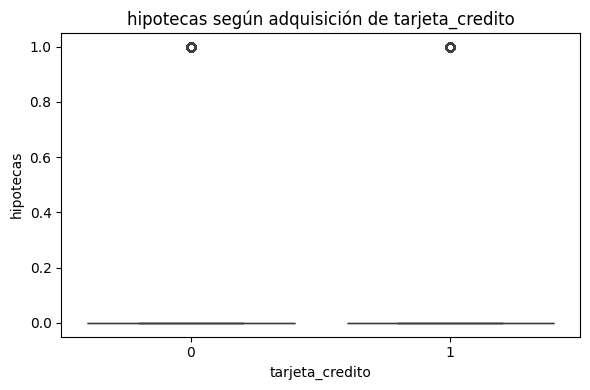

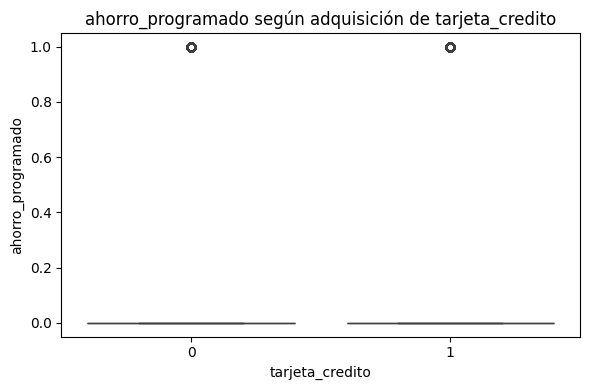

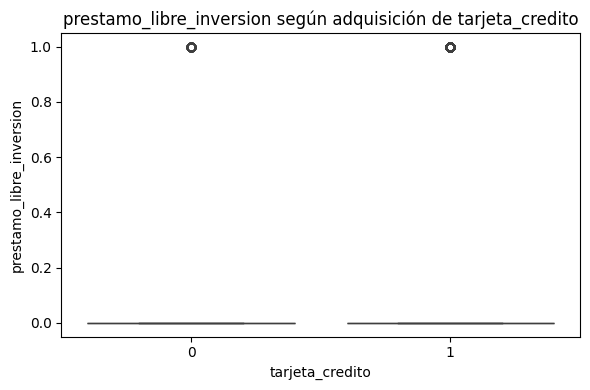

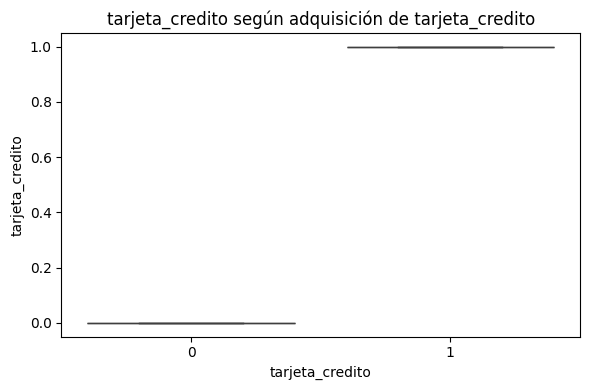

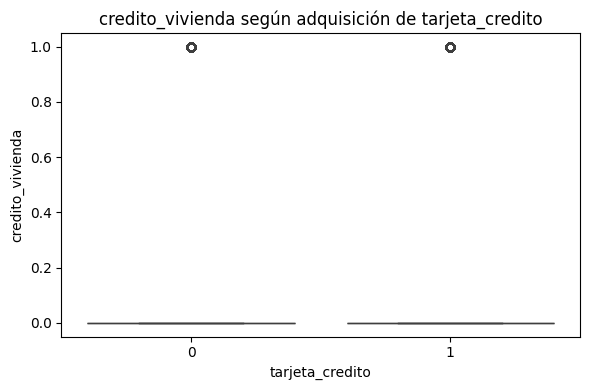

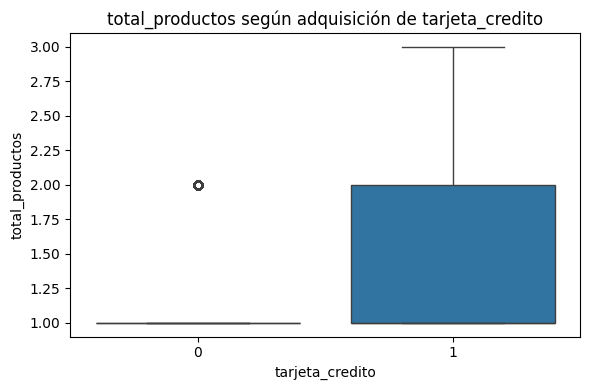

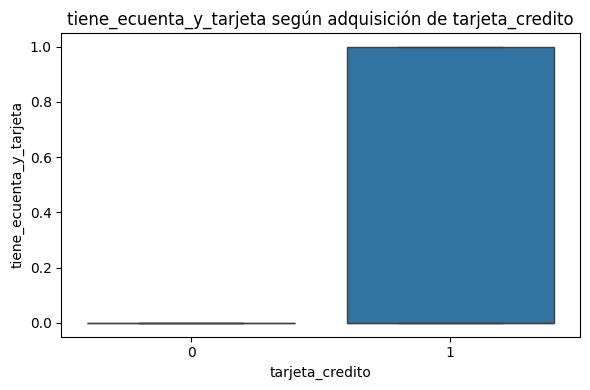

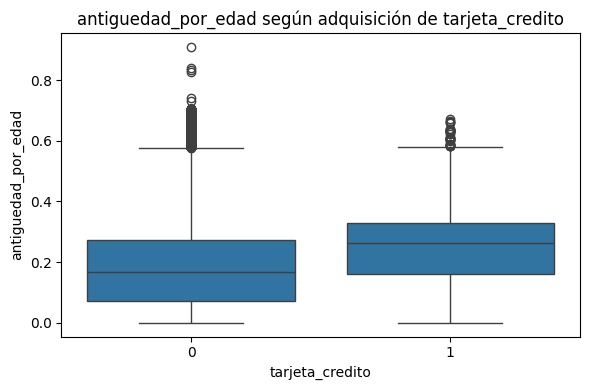

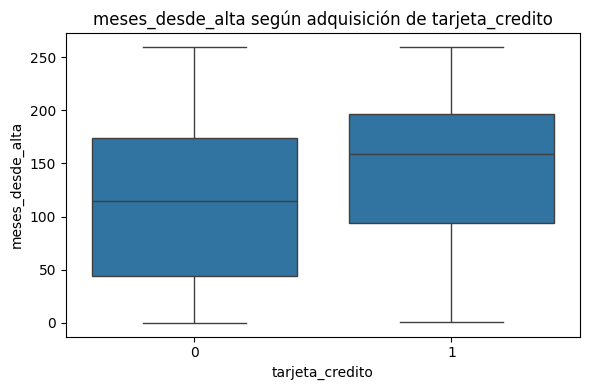

In [35]:
target = 'tarjeta_credito' 
for col in var_numericas_2:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} según adquisición de {target}')
    plt.tight_layout()
    plt.show()


## Matriz de correlación 

In [13]:
# Filtrar columnas numéricas
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num = df_num.drop(columns=['ncodpers'], errors='ignore')


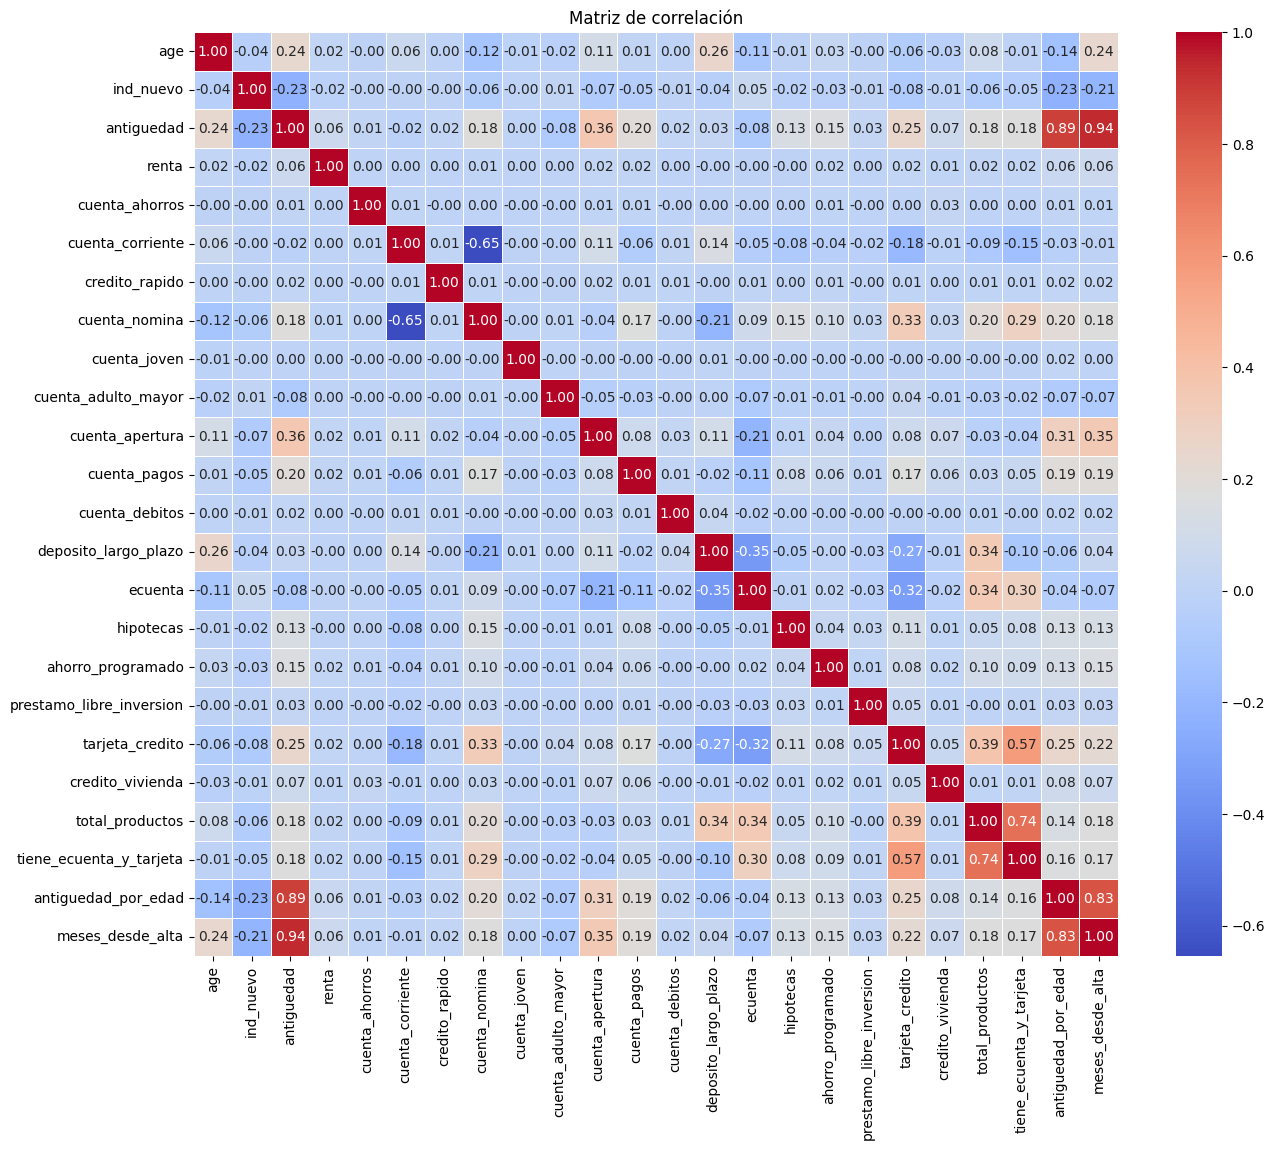

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz
corr = df_num.corr()

# Visualizar
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Matriz de correlación")
plt.show()

## Para ver las variables mas correlacinadas con una variable objetivo

In [28]:
corr_target = corr['tarjeta_credito'].sort_values(ascending=False)
print(corr_target)

# AGREGAR LAS CATEGORICAS !!!!
# PATRONES DENTRO DEL DATASET, PARA DETERMINAR LAS COLUMNAS TARGET LO QUE INFLUYE 

tarjeta_credito             1.000000
tiene_ecuenta_y_tarjeta     0.573919
total_productos             0.385156
cuenta_nomina               0.331898
antiguedad                  0.245189
antiguedad_por_edad         0.245185
meses_desde_alta            0.223060
cuenta_pagos                0.171670
hipotecas                   0.110008
ahorro_programado           0.082569
cuenta_apertura             0.081147
prestamo_libre_inversion    0.050137
credito_vivienda            0.047408
cuenta_adulto_mayor         0.040853
renta                       0.022273
credito_rapido              0.006810
cuenta_ahorros              0.000219
cuenta_debitos             -0.002606
cuenta_joven               -0.004069
age                        -0.057983
ind_nuevo                  -0.077173
cuenta_corriente           -0.184510
deposito_largo_plazo       -0.267223
ecuenta                    -0.321298
Name: tarjeta_credito, dtype: float64


In [29]:
corr_target2 = corr['ecuenta'].sort_values(ascending=False)
print(corr_target2)

ecuenta                     1.000000
total_productos             0.341360
tiene_ecuenta_y_tarjeta     0.296500
cuenta_nomina               0.086708
ind_nuevo                   0.047094
ahorro_programado           0.021083
credito_rapido              0.005107
cuenta_ahorros             -0.001067
renta                      -0.001893
cuenta_joven               -0.004536
hipotecas                  -0.007652
cuenta_debitos             -0.024065
credito_vivienda           -0.024500
prestamo_libre_inversion   -0.025230
antiguedad_por_edad        -0.042500
cuenta_corriente           -0.048050
meses_desde_alta           -0.068003
cuenta_adulto_mayor        -0.074241
antiguedad                 -0.083192
age                        -0.106972
cuenta_pagos               -0.114768
cuenta_apertura            -0.212100
tarjeta_credito            -0.321298
deposito_largo_plazo       -0.346021
Name: ecuenta, dtype: float64


In [30]:
corr_target3 = corr['deposito_largo_plazo'].sort_values(ascending=False)
print(corr_target3)

deposito_largo_plazo        1.000000
total_productos             0.336311
age                         0.255857
cuenta_corriente            0.143918
cuenta_apertura             0.107280
cuenta_debitos              0.039967
meses_desde_alta            0.037277
antiguedad                  0.029949
cuenta_joven                0.005465
cuenta_adulto_mayor         0.003150
cuenta_ahorros              0.002580
ahorro_programado          -0.001357
renta                      -0.001565
credito_rapido             -0.003034
credito_vivienda           -0.014959
cuenta_pagos               -0.018405
prestamo_libre_inversion   -0.026406
ind_nuevo                  -0.037327
hipotecas                  -0.054616
antiguedad_por_edad        -0.058815
tiene_ecuenta_y_tarjeta    -0.096199
cuenta_nomina              -0.208232
tarjeta_credito            -0.267223
ecuenta                    -0.346021
Name: deposito_largo_plazo, dtype: float64


## Descargamos el archivo 

In [40]:
df.to_csv("santander_limpio_filtrado_y_data_engeniering.csv", index=False)

## Featuring engenieering

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder  

In [ ]:
# ## Total productos !!
# df['total_productos'] = df[['ecuenta', 'tarjeta_credito', 'deposito_largo_plazo']].sum(axis=1)

# #Tiene ecuenta y tarjeta de crédito 
# df['tiene_ecuenta_y_tarjeta'] = df['ecuenta'] * df['tarjeta_credito']  


# #antiguedad por edad:
# # expresa el porcentaje de vida que lleva el cliente en el banco 
# df['antiguedad_por_edad'] = df['antiguedad'] / (df['age'] * 12)  # Convertir edad a meses

# df['meses_desde_alta'] = (df['fecha_dato'] - df['fecha_alta']).dt.days / 30  


In [15]:
# Seleccionar columnas numéricas
cols_numericas = df.select_dtypes(include=['int64', 'float64']).columns

# Filtrar columnas no binarias
no_binarias = [col for col in cols_numericas if df[col].nunique() > 2]
conteo_ceros = df[no_binarias].apply(lambda col: (col == 0).sum())
print(conteo_ceros)

ncodpers                0
age                     0
antiguedad             29
renta                   0
total_productos         0
antiguedad_por_edad    29
meses_desde_alta        0
dtype: int64


In [33]:
df.to_csv("santander_limpio_filtrado_filas_y_data_engeniering.csv", index=False)

## Codificar variables categóricas

In [16]:
df_encoded = pd.get_dummies(df, columns=var_categoricas_2, drop_first=True)

## Normalizar o escalar variables numéricas

In [17]:
# Quitar columnas target de la lista de columnas a escalar
targets = ['tarjeta_credito', 'ecuenta', 'deposito_largo_plazo']
print(set(var_numericas_2) & set(targets))

var_numericas_2 = [col for col in var_numericas_2 if col not in targets] # asegura que no estén las target 
print(set(var_numericas_2) & set(targets))


{'ecuenta', 'deposito_largo_plazo', 'tarjeta_credito'}
set()


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded[var_numericas_2] = scaler.fit_transform(df_encoded[var_numericas_2])

In [19]:
# --- 3. Separación de X e y ---
X = df_encoded.drop(columns=targets)
X = X.drop(columns=['fecha_dato', 'fecha_alta'])  # quitar datetime
y = df_encoded[targets].astype(int)  # aseguramos enteros

In [43]:
# y = df_encoded[['tarjeta_credito', 'ecuenta', 'deposito_largo_plazo']].astype(int)

# --- 3. Separación de X e y ---
X = df_encoded.drop(columns=targets)
y = df_encoded[targets].astype(int)  # aseguramos enteros

In [ ]:
# 3. Definir columnas objetivo (ya procesado el dataset completo)
# targets = ['tarjeta_credito', 'ecuenta', 'deposito_largo_plazo']
# y = df_encoded[targets].astype(int)

In [20]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier  # Puedes descomentar si tienes XGBoost instalado
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# ---------------------------
# 1. Selección de targets
# ---------------------------
# targets = ['tarjeta_credito', 'ecuenta', 'deposito_largo_plazo']
# X = df_encoded.drop(columns=targets)
# y = df_encoded[targets]

# # Asegurarse de que las etiquetas sean enteras
# y = df_encoded[['tarjeta_credito', 'ecuenta', 'deposito_largo_plazo']].astype(int)

# ---------------------------
# 2. División de datos
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# 3. Definición de modelos (uno a la vez)
# ---------------------------


modelo_base = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
# modelo_base = LogisticRegression(max_iter=500, solver='lbfgs')
# modelo_base = DecisionTreeClassifier(max_depth=6, random_state=42)
# modelo_base = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

# ---------------------------
# 4. Entrenamiento con Multi-output wrapper
# ---------------------------
# modelo_multi = MultiOutputClassifier(estimator=modelo_base)
# modelo_multi.fit(X_train, y_train)


# # ---------------------------
# # 6. Predicción y evaluación
# # ---------------------------
# y_pred = modelo_multi.predict(X_test)

# # Reporte para cada variable objetivo
# for i, target in enumerate(targets):
#     print(f"\n📌 Resultados para: {target}")
#     print(classification_report(y_test[target], y_pred[:, i]))


In [21]:
modelo_multi = MultiOutputClassifier(estimator=modelo_base)
modelo_multi.fit(X_train, y_train)


# ---------------------------
# 6. Predicción y evaluación
# ---------------------------
y_pred = modelo_multi.predict(X_test)

# Reporte para cada variable objetivo
# for i, target in enumerate(targets):
#     print(f"\n📌 Resultados para: {target}")
#     print(classification_report(y_test[target], y_pred[:, i]))

In [39]:
y_pred = modelo_multi.predict(X_test)
y_pred


array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 1, 0]], shape=(63880, 3))

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='samples')

0.6044479231893133

## RandomizedSearchCV

In [22]:
from scipy.stats import randint
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


rf_random = {
    "estimator__n_estimators": randint(50,200),
    "estimator__max_depth": randint(3,15),
    "estimator__min_samples_split": randint(2, 10),
    "estimator__min_samples_leaf": randint(1, 10),
    "estimator__max_features": ["sqrt", "log2"]
}

# Crear el modelo base
# rf_model = RandomForestClassifier(random_state=42)
multi_rf = MultiOutputClassifier(modelo_base)



# Optimización con RandomizedSearchCV
rs_model = RandomizedSearchCV(
    multi_rf,
    param_distributions=rf_random,
    scoring="f1_samples",  # o "roc_auc", "f1", "precision", "recall"
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Usa todos los núcleos
)

# 5. Ajustar
rs_model.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(rs_model.best_params_)
print("Mejor f1_score promedio:", rs_model.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END estimator__max_depth=9, estimator__max_features=log2, estimator__min_samples_leaf=8, estimator__min_samples_split=6, estimator__n_estimators=70; total time=  28.4s
[CV] END estimator__max_depth=9, estimator__max_features=log2, estimator__min_samples_leaf=8, estimator__min_samples_split=6, estimator__n_estimators=70; total time=  28.5s


: 

## pendientes : 
# 5.1 Transformación de variables categóricas para correlación
# matriz de correlacion
# featuring engineering (personas que adquirieron el producto en el trimestre
# columna predictora  saber cuantos productos tiene cada persona
# fecha alta y fecha dato para saber antiguedad 
   )


In [16]:
consultar_fecha= """
SELECT distinct(fecha_dato) AS total_fechas
FROM santander_trimestre
"""

df_fechas = pd.read_sql(consultar_fecha, con)
df_fechas

,total_fechas
0,2016-03-28
1,2016-04-28
2,2016-05-28


In [17]:
clientes_unicos = '''
SELECT fecha_dato, COUNT(DISTINCT ncodpers) AS clientes_unicos
FROM santander_trimestre
where ind_actividad_cliente=1
GROUP BY fecha_dato
ORDER BY fecha_dato;

'''
df_cli_uni= pd.read_sql(clientes_unicos, con)
df_cli_uni

,fecha_dato,clientes_unicos
0,2016-03-28,392937
1,2016-04-28,394479
2,2016-05-28,395723


In [18]:
sumatoria_por_productos = '''

SELECT 
    fecha_dato,
    total_productos_activos,
    COUNT(*) AS cantidad_clientes
FROM (
    SELECT 
        ncodpers,
        fecha_dato,
        (
            COALESCE(ind_ahor_fin_ult1, 0) +
            COALESCE(ind_aval_fin_ult1, 0) +
            COALESCE(ind_cco_fin_ult1, 0) +
            COALESCE(ind_cder_fin_ult1, 0) +
            COALESCE(ind_cno_fin_ult1, 0) +
            COALESCE(ind_ctju_fin_ult1, 0) +
            COALESCE(ind_ctma_fin_ult1, 0) +
            COALESCE(ind_ctop_fin_ult1, 0) +
            COALESCE(ind_ctpp_fin_ult1, 0) +
            COALESCE(ind_deco_fin_ult1, 0) +
            COALESCE(ind_deme_fin_ult1, 0) +
            COALESCE(ind_dela_fin_ult1, 0) +
            COALESCE(ind_ecue_fin_ult1, 0) +
            COALESCE(ind_fond_fin_ult1, 0) +
            COALESCE(ind_hip_fin_ult1, 0) +
            COALESCE(ind_plan_fin_ult1, 0) +
            COALESCE(ind_pres_fin_ult1, 0) +
            COALESCE(ind_reca_fin_ult1, 0) +
            COALESCE(ind_tjcr_fin_ult1, 0) +
            COALESCE(ind_valo_fin_ult1, 0) +
            COALESCE(ind_viv_fin_ult1, 0) +
            COALESCE(ind_nomina_ult1, 0) +
            COALESCE(ind_nom_pens_ult1, 0) +
            COALESCE(ind_recibo_ult1, 0)
        ) AS total_productos_activos
    FROM santander_trimestre
    WHERE ind_actividad_cliente = 1
) AS sub
where total_productos_activos <10
GROUP BY fecha_dato, total_productos_activos
ORDER BY fecha_dato, total_productos_activos;
'''

df_conteo_productos= pd.read_sql(sumatoria_por_productos, con)
df_conteo_productos


,fecha_dato,total_productos_activos,cantidad_clientes
0,2016-03-28,0.0,1535
1,2016-03-28,1.0,170027
2,2016-03-28,2.0,100784
3,2016-03-28,3.0,46567
4,2016-03-28,4.0,28040
5,2016-03-28,5.0,17869
6,2016-03-28,6.0,12400
7,2016-03-28,7.0,8320
8,2016-03-28,8.0,4450
9,2016-03-28,9.0,1920


In [19]:
df_total_fechas = df[['fecha_dato']].drop_duplicates().rename(columns={'fecha_dato': 'total_fechas'})
